# Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Create dataset

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did NOT experience side effects 
    random_older = randint(64,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% younger individuals who did NOT experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% older individuals who did experience side effects
    random_older = randint(64,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [4]:
#print row data
for i in train_samples:
    print(i)

28
79
51
98
63
65
31
77
32
92
27
96
26
96
21
86
43
97
41
81
33
87
60
67
18
97
24
65
18
92
34
90
19
83
27
80
36
99
24
78
41
90
22
80
14
100
15
100
25
84
20
65
62
96
38
81
29
97
41
68
31
95
37
65
46
70
56
88
14
99
23
95
32
67
35
95
36
66
38
65
37
94
54
74
53
79
54
65
32
75
27
83
20
66
21
93
61
77
23
86
19
83
23
71
36
79
32
90
59
97
48
85
23
75
54
75
26
86
30
89
52
97
14
80
22
83
24
77
43
80
63
92
36
96
58
64
27
93
49
65
56
92
41
90
55
95
16
68
52
87
29
80
33
66
17
75
40
82
43
77
58
84
46
82
16
80
21
69
21
72
44
66
50
69
22
70
51
97
13
91
45
85
48
94
52
83
49
92
53
64
47
74
49
79
22
90
50
90
32
86
29
78
58
80
17
94
54
72
47
64
16
64
47
75
30
87
50
77
31
81
54
95
53
88
24
77
57
79
25
95
53
75
28
78
23
97
21
97
54
75
37
80
50
87
40
100
55
81
50
79
59
71
48
79
29
73
15
93
17
73
15
68
36
92
45
95
37
71
22
88
32
98
48
96
28
77
28
76
58
94
24
87
39
84
26
75
14
72
51
85
26
64
33
83
14
67
40
75
49
82
14
84
39
74
21
67
32
73
44
84
17
86
21
79
28
64
57
67
54
64
57
78
39
83
43
97
27
89
33
73
34
65
5

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_samples.shape

(2100,)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaler function does not accept 1d arrays like (4200,).
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

# Create a model

In [7]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


<font color='gray'>As first layer in a sequential model:</font>    
model = Sequential()  
model.add(Dense(32, input_shape=(16,)))  
<font color='gray'>Now the model will take as input arrays of shape (*, 16) and output arrays of shape (*, 32)  </font>  
  
<font color='gray'>After the first layer, you don't need to specify the size of the input anymore:</font>  
model.add(Dense(32))

##### input_shape=(batch_size, ..., input_dim)  
Example: if you have 30 images of 50x50 pixels in RGB (3 channels), the shape of your input data is (30,50,50,3). Then your input layer tensor, must have this shape (see details in the "shapes in keras" section).  
if using channels_last: (batch_size, imageside1, imageside2, channels)  
if using channels_first: (batch_size, channels, imageside1, imageside2)

In [27]:
# create a model
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [28]:
model.summary()   # quick review the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(Adam(lr=.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
model.fit(scaled_train_samples, train_labels, 
          validation_split=0.1,
          batch_size=10, epochs=20, shuffle=True, verbose=2)
# shuffle is not true for the vaildation data, the vaildation part 
# is still keep the last 10% of training dataset. So we should shuffle
# the dataset at preprocessing data part

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.7199 - acc: 0.4709 - val_loss: 0.7050 - val_acc: 0.3381
Epoch 2/20
 - 0s - loss: 0.6874 - acc: 0.5037 - val_loss: 0.6687 - val_acc: 0.6476
Epoch 3/20
 - 0s - loss: 0.6599 - acc: 0.6243 - val_loss: 0.6393 - val_acc: 0.7000
Epoch 4/20
 - 0s - loss: 0.6372 - acc: 0.6646 - val_loss: 0.6109 - val_acc: 0.7429
Epoch 5/20
 - 0s - loss: 0.6142 - acc: 0.6974 - val_loss: 0.5839 - val_acc: 0.7762
Epoch 6/20
 - 0s - loss: 0.5913 - acc: 0.7259 - val_loss: 0.5555 - val_acc: 0.7952
Epoch 7/20
 - 0s - loss: 0.5685 - acc: 0.7529 - val_loss: 0.5279 - val_acc: 0.8238
Epoch 8/20
 - 0s - loss: 0.5461 - acc: 0.7804 - val_loss: 0.5005 - val_acc: 0.8381
Epoch 9/20
 - 0s - loss: 0.5237 - acc: 0.8005 - val_loss: 0.4734 - val_acc: 0.8762
Epoch 10/20
 - 0s - loss: 0.5017 - acc: 0.8159 - val_loss: 0.4465 - val_acc: 0.8952
Epoch 11/20
 - 0s - loss: 0.4802 - acc: 0.8291 - val_loss: 0.4202 - val_acc: 0.9000
Epoch 12/20
 - 0s - loss: 0.4596 - acc

# model.save()

This save function saves：  
    The architecture of the model, allowing to re-create the model  
    The weights of the model  
    The training configuration (loss, optimizer)  
    The state of the optimizer alling to resume training exacity where you left off  

In [12]:
model.save('medical_trial_model.h5')

In [13]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [14]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
new_model.get_weights()

[array([[-0.5330676 , -0.27821103,  0.66362077,  0.51959395, -0.10632437,
         -0.07923597,  0.43345317, -0.4650604 , -0.35962516, -0.38367748,
          0.20082788, -0.29051304,  0.5245884 , -0.12347394, -0.3614539 ,
         -0.3703943 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.13163269, -0.11866675,  0.        ,
         0.        , -0.00451486,  0.        ,  0.        ,  0.        ,
        -0.07102583,  0.        , -0.11425906,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-1.71793669e-01,  2.17446536e-01,  2.42727071e-01,
          9.69874859e-02,  9.67100859e-02,  1.08836234e-01,
         -3.10962141e-01,  1.23939961e-01,  1.22306645e-02,
         -2.01582730e-01, -2.24872485e-01,  2.51265258e-01,
         -3.92806232e-02,  2.28965789e-01,  2.48862892e-01,
         -7.86962509e-02,  3.44911903e-01,  1.71143621e-01,
         -5.80894947e-02,  2.69251317e-01, -1.17990941e-01,
          2.59813577e-01,  3.20966095e-01,  1.87110096e-01,
 

In [16]:
new_model.optimizer

# model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [17]:
# save as json
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

In [18]:
from keras.models import model_from_json
model = model_from_json(json_string)

from keras.models import model_from_yaml
model = model_from_yaml(yaml_string)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/saving.py:473: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


# Preprocess Test Data

In [31]:
test_labels = []
test_samples = []

In [32]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects 
    random_older = randint(64,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% older individuals who did experience side effects
    random_older = randint(64,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [33]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Prediction

In [35]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=1)

500/500 [==============================] - 0s 138us/step


In [36]:
print(predictions.shape)
for i in predictions:
    print(i)
    
# The first column is the probability of 0. 
# The second column is the probability of 1.

(500, 2)
[0.5818912  0.41810882]
[0.08234406 0.91765594]
[0.85541487 0.14458515]
[0.17963728 0.82036275]
[0.61884624 0.38115376]
[0.07876299 0.921237  ]
[0.85411096 0.14588904]
[0.05753394 0.9424661 ]
[0.5630342  0.43696585]
[0.42900598 0.570994  ]
[0.6005117  0.39948824]
[0.06297187 0.93702817]
[0.83866525 0.16133481]
[0.24351098 0.756489  ]
[0.8036599  0.19634007]
[0.12122361 0.87877643]
[0.5630342  0.43696582]
[0.06297187 0.93702817]
[0.61884624 0.38115376]
[0.07876298 0.921237  ]
[0.72050965 0.27949035]
[0.06297187 0.93702817]
[0.505579   0.49442098]
[0.22959809 0.77040195]
[0.8036599  0.19634007]
[0.28856632 0.71143365]
[0.83866525 0.16133481]
[0.15803534 0.8419646 ]
[0.8448046 0.1551954]
[0.16856062 0.8314394 ]
[0.505579   0.49442098]
[0.13859229 0.8614077 ]
[0.85234755 0.14765243]
[0.16856062 0.8314394 ]
[0.8537403  0.14625967]
[0.06888618 0.9311138 ]
[0.85541487 0.14458515]
[0.22959809 0.77040195]
[0.8536717  0.14632826]
[0.3556872  0.64431286]
[0.85672325 0.14327677]
[0.092961

In [37]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10,verbose=1)

500/500 [==============================] - 0s 38us/step


In [38]:
print(rounded_predictions.shape)
for i in rounded_predictions:
    print(i)

(500,)
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0

# Confusion Matrix

In [39]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [40]:
cm = confusion_matrix(test_labels, rounded_predictions)

plot confusion matrix function is on the webpage:  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [41]:

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,newaxis]
        print('Normalized confusion matirx')
    else:
        print('Confusion matirx, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matirx, without normalization
[[184  66]
 [ 49 201]]


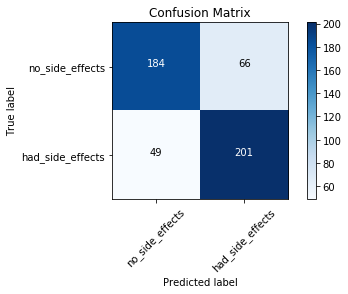

In [42]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')